In [1]:
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

## Monthly Payment Equation

Useable:
```py
1. EQUATION_MONTHLYPAYMENT

2. mortgagepayment(P=,apr=,yrs=)  -> int

3. mortgagePayTable(P=,apr=,yrs=) -> dataFrame
```

In [27]:
class EQN :
   class MonthlyPayment :
      """
         ~~~~~~~~~~~~~~~~~~~~~
         P     PRINCIPLE
         r     RATE/APR
         n     NO. OF MONTHS
         mp    MONTHLY PAYMENT 
         ~~~~~~~~~~~~~~~~~~~~~
      """
      P, r, n, mp= sp.symbols("P r n [PAY_{mo}]")
      
      equation = sp.Eq(mp , P* r* (((1 + r)** n) / ((1 + r)** n - 1)))
      
      def solveMP (Principle, rate, n_months, display = 0):
         eq = EQN.MonthlyPayment.equation
         s = EQN.MonthlyPayment
         mp = EQN.MonthlyPayment.mp
         
         f = eq.subs({s.P:Principle,   s.n:n_months,  s.r:rate})
         
         if display == 0:
            return round(sp.solve(f,s.mp)[0],2)
         else:
            return f



In [32]:
eq = EQN.MonthlyPayment
x = eq.solveMP (Principle= 100_000,     rate=0.0029,      n_months=13 * 12)
x

797.83

In [33]:
def mortgagepayment (P,apr,yrs) -> float:
   
   """----MORTGAGE PAYMENT--------------------------------
                                  --> MONTHLY PAYMENT IN $
   -------------------------------------------------------
      >>> P     : principle
      >>> apr   : decimal APR
      >>> yrs   : length of term in years
   ======================================================
   """
      
   r = apr / 12      # MONTHLY PERC. RATE
   n = yrs * 12      # NUMBER OF MONTHS/ TERM
   
   mp = round(P * r * ((r+1)**n) / ((r+1)**n-1) , 2)
   #print (f'Monthly Payment:\t\t${mp}')
   return mp
   #-----------------------------------------------------

In [7]:
def mortgagePayTable (P, apr, yrs):
   """---MORTGAGE PAY TABLE--------------------------------------
     Returns a  DATAFRAME of the payment details
     ------------------------------------------------------------ 
     from:
         >>> P       :principle
         >>> apr     :decimal APR
         >>> yrs     :length of term (yrs)
      ===========================================================
   """
   r = apr / 12 #mpr
   n = yrs * 12 #months in term
   
   mp = round(P * r * ((r+1)**n) / ((r+1)**n-1) , 2)
   
   aprpc = apr
   totalPaid = mp * yrs * 12
   interest = totalPaid - P
   interest_asPercent = round(interest / (totalPaid) * 100 ,1)
   
   i = f'{round(interest,2):,}'
   i_display = f'${i} ({interest_asPercent}%)'
   APR = f'{apr:%}'
   yrs = f'{yrs}yrs'
   data = [f'{P:,}',APR,yrs,mp,i_display]
   cols = ["Principle","APR %","Years","MONTHLY Payment","Total Interest"]
   
   return round(pd.DataFrame(data,index=cols,columns=["RESULT"]))
   #-------------------------------------------------------------------

In [8]:
table = pd.concat(
   (mortgagePayTable (104_000 , 0.031 , 18) ,
   mortgagePayTable  (249_000 , 0.0285 , 23) ,
   mortgagePayTable  (249_000 , apr=0.0385 , yrs=23),
   mortgagePayTable  (89_000 , apr= 0.07 , yrs= 23)) ,
   axis=1
)
table

,RESULT,RESULT,RESULT,RESULT
Principle,"104,000","249,000","249,000","89,000"
APR %,3.100000%,2.850000%,3.850000%,7.000000%
Years,18yrs,23yrs,23yrs,23yrs
MONTHLY Payment,628.85,1230.97,1361.16,649.63
Total Interest,"$31,831.6 (23.4%)","$90,747.72 (26.7%)","$126,680.16 (33.7%)","$90,297.88 (50.4%)"


## Mortgage APR Table

In [ ]:
def APRtable (minAPR, maxAPR, principle, years):
   listAPR = np.linspace(minAPR,maxAPR,10)
   
   df = pd.DataFrame(listAPR,columns=['APR'])
   df['APR%'] = round(df['APR'] * 100,1)
   df['Monthly$'] = mortgagepayment(principle, df['APR'], years)
   display(Markdown("### PRINCIPLE = $" + str(principle)))
   return df.loc[:,'APR%':]

### PRINCIPLE = $20000

,APR%,Monthly$
0,3.0,859.62
1,3.8,866.52
2,4.6,873.45
3,5.3,880.42
4,6.1,887.41
5,6.9,894.44
6,7.7,901.51
7,8.4,908.61
8,9.2,915.74
9,10.0,922.90


*Stats of Monthly$*

count     10.0
mean     891.1
std       21.3
min      859.6
25%      875.2
50%      890.9
75%      906.8
max      922.9
Name: Monthly$, dtype: float64

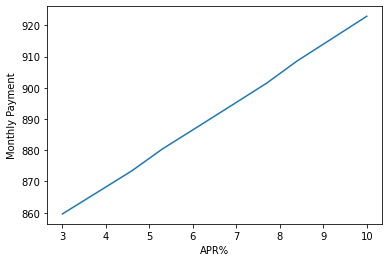

In [ ]:
dta = APRtable(0.03,0.1,20000,2)
display(dta)
plt.plot(dta['APR%'],dta['Monthly$'])
plt.xlabel("APR%")
plt.ylabel("Monthly Payment")
display(Markdown('*Stats of Monthly$*'),round(dta['Monthly$'].describe(),1))

In [ ]:
APRtable(0.005,0.071, 110000, 23)

### PRINCIPLE = $110000

,APR%,Monthly$
0,0.5,421.99
1,1.2,457.95
2,2.0,495.78
3,2.7,535.46
4,3.4,576.95
5,4.2,620.21
6,4.9,665.18
7,5.6,711.82
8,6.4,760.04
9,7.1,809.78


SYMBOL | Represents
-------|-----------------
$moPmnt$|`MONTHLY PAYMENT`
$P$|`PRINCIPLE`
$n$|`No. MONTHS`
$r$|`INTEREST RATE (MONTHLY)`

In [ ]:
def apr_vs_cost_change (apr1,apr2,cost1,cost2) :
   ch_apr = apr2 - apr1
   ch_mo_pmnt = round((cost2 / cost1-1)*100, 1)
   output = f'{ch_apr}% change APR -> \n{ch_mo_pmnt}% change monthly cost'
   print (output)

In [ ]:
apr_vs_cost_change (1.5 , 3.5, 579, 695)

2.0% change APR -> 
20.0% change monthly cost


In [ ]:
apr_vs_cost_change (1.5,6.5,579,894)

5.0% change APR -> 
54.4% change monthly cost
